In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

# Connect census data to epc data and the clusters and make spatial file

In [2]:
census = pd.read_csv('./../Data/census/2021/OA_combined_data_refined.csv').drop(columns = {'Unnamed: 0'})
cluster = pd.read_csv('./../Data/Clusters_EfficiencyinPRS/OA_clusters_9.csv').drop(columns = {'Unnamed: 0'})
oa_house_area = pd.read_csv('./../Data/Energy_Performance_Certificate/OA_house_area_from_epc.csv').drop(columns = {'Unnamed: 0'}).rename(columns= {'oa21cd':'OA21CD'})
lad_house_area = pd.read_csv('./../Data/Energy_Performance_Certificate/OA_house_area_from_epc.csv').drop(columns = {'Unnamed: 0'}).rename(columns= {'oa21cd':'OA21CD'})
OA = gpd.read_file('./../Data/boundaries/Output_Areas/Output_Areas_Dec_2021_Boundaries_Generalised_Clipped_EW_BGC_2022_-5131276949491721609.geojson')
LA = gpd.read_file('../Data/boundaries/Output_Areas/LAD_Dec_2021_GB_BFC_2022_-8975151699474964544.geojson')
lookup = pd.read_csv('../Data/boundaries/Output_Areas/OA_LAD_lookup.csv').drop(columns = {'Unnamed: 0'})
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188880 entries, 0 to 188879
Columns: 106 entries, OA21CD to N_immigrants_arrived_after18_rate_P
dtypes: float64(50), int64(55), object(1)
memory usage: 152.8+ MB


In [3]:
cluster = gpd.read_file('../Data/Clusters_EfficiencyinPRS/Final_Clusters/OA_clusters_lessvariables.gpkg')
cluster = pd.DataFrame(cluster.loc[:,['OA Code','cluster_9']]).rename(columns = {'OA Code':'OA21CD'})
cluster

,OA21CD,cluster_9
0,E00036131,5
1,E00036132,9
2,E00036129,5
3,E00036130,5
4,E00036299,1
...,...,...
151885,E00036122,7
151886,E00036127,7
151887,E00036128,1
151888,E00036125,5


<Axes: >

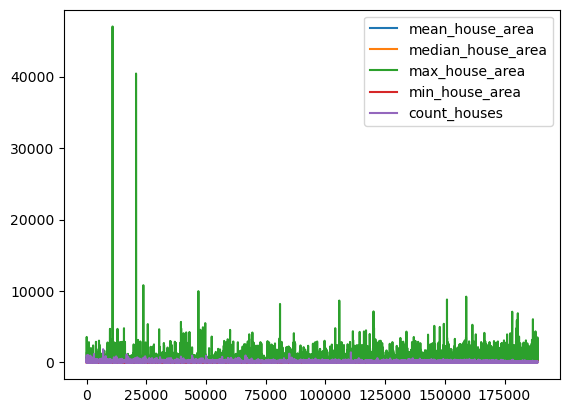

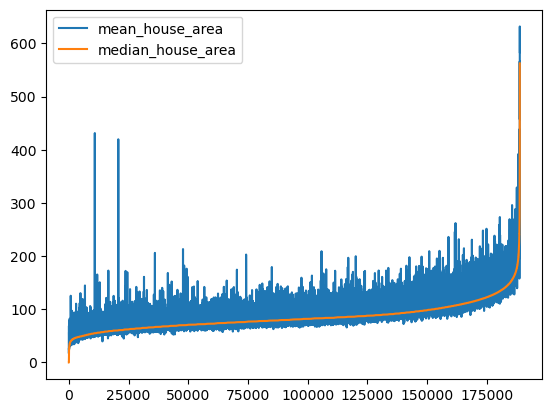

In [4]:
oa_house_area.sort_values(['median_house_area'], ascending = True).reset_index().drop(columns={'index'}).plot()
oa_house_area.sort_values(['median_house_area'], ascending = True).reset_index().drop(columns={'index','max_house_area','min_house_area','count_houses'}).plot()

In [5]:
test = oa_house_area.sort_values(['median_house_area'], ascending = True).reset_index().drop(columns={'index'})
test['diff'] = test['median_house_area'] - test['mean_house_area']
test = test.merge(lookup, on = 'OA21CD', how = 'left')
test

,OA21CD,mean_house_area,median_house_area,max_house_area,min_house_area,count_houses,diff,LAD21CD
0,E00185824,25.397463,0.0,104.00,0.0,67,-25.397463,NaN
1,E00178799,17.089327,0.0,90.18,0.0,104,-17.089327,E09000003
2,E00179061,29.383333,2.0,101.00,0.0,60,-27.383333,E09000005
3,E00167051,41.479756,14.0,288.00,14.0,123,-27.479756,E07000008
4,E00173501,21.641487,16.0,161.00,12.0,854,-5.641487,E06000018
...,...,...,...,...,...,...,...,...
188832,E00010064,601.713750,505.0,2279.00,56.0,80,-96.713750,E09000014
188833,E00154587,514.314778,510.5,1123.00,155.0,90,-3.814778,E07000207
188834,E00154797,591.204447,523.0,1690.00,18.0,103,-68.204447,E07000207
188835,E00154799,631.968495,529.0,2137.00,40.0,93,-102.968495,E07000207


In [6]:
test2=OA.merge(test, on='OA21CD')

In [7]:
test3 = test.copy()

In [8]:
test2['count_houses'] = np.where(test2['count_houses']<30,np.nan,test2['count_houses'])
test2.describe()

,OBJECTID,mean_house_area,median_house_area,max_house_area,min_house_area,count_houses,diff
count,188837.000000,188837.000000,188837.000000,188837.000000,188837.000000,187822.000000,188837.000000
mean,94431.469230,91.859368,84.859431,245.362418,40.225039,93.965132,-6.999937
std,54520.144403,28.678176,24.828772,250.574257,15.057420,39.774739,9.776743
min,1.000000,17.089327,0.000000,26.000000,0.000000,30.000000,-376.462047
25%,47217.000000,73.842748,70.000000,142.000000,31.000000,70.000000,-10.518599
50%,94430.000000,85.022759,81.000000,188.860000,39.900000,86.000000,-4.934410
75%,141640.000000,102.339859,94.000000,280.000000,49.000000,107.000000,-1.178969
max,188880.000000,631.968495,562.500000,47016.000000,236.000000,1858.000000,87.101846


In [57]:
test2.to_file('../Data/Energy_Performance_Certificate/OA_house_area_spatial.geojson')

# Interactive map to explore
m = test2.explore(column = 'diff', cmap = 'RdYlBu', name = 'difference between mean and median')
test2.explore(column = 'median_house_area', cmap = 'Blues', name = 'median', m=m)
test2.explore(column = 'mean_house_area', cmap = 'Greens', name = 'mean', m=m)
folium.LayerControl().add_to(m)


map this!

In [10]:
data_mid = census.merge(oa_house_area, on = 'OA21CD', how = 'left')
data_mid.isna().describe()

,OA21CD,Total_N_residents,N_residents_no_community,N_dwellings,N_households,H_1-2_p,H_3-4_p,H_5-7_p,H_8-more_p,N_of_people,...,N_adults_19_64_rate_P,N_young_adults_20_39_rate_P,N_mature_adults_40_64_rate_P,N_retirees_65_m_rate_P,N_immigrants_arrived_after18_rate_P,mean_house_area,median_house_area,max_house_area,min_house_area,count_houses
count,188880,188880,188880,188880,188880,188880,188880,188880,188880,188880,...,188880,188880,188880,188880,188880,188880,188880,188880,188880,188880
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,188880,188880,188880,188880,188880,188880,188880,188880,188880,188880,...,188880,188880,188880,188880,188880,188837,188837,188837,188837,188837


In [60]:
data_mid.columns

Index(['OA21CD', 'Total_N_residents', 'N_residents_no_community',
       'N_dwellings', 'N_households', 'H_1-2_p', 'H_3-4_p', 'H_5-7_p',
       'H_8-more_p', 'N_of_people',
       ...
       'N_adults_19_64_rate_P', 'N_young_adults_20_39_rate_P',
       'N_mature_adults_40_64_rate_P', 'N_retirees_65_m_rate_P',
       'N_immigrants_arrived_after18_rate_P', 'mean_house_area',
       'median_house_area', 'max_house_area', 'min_house_area',
       'count_houses'],
      dtype='object', length=111)

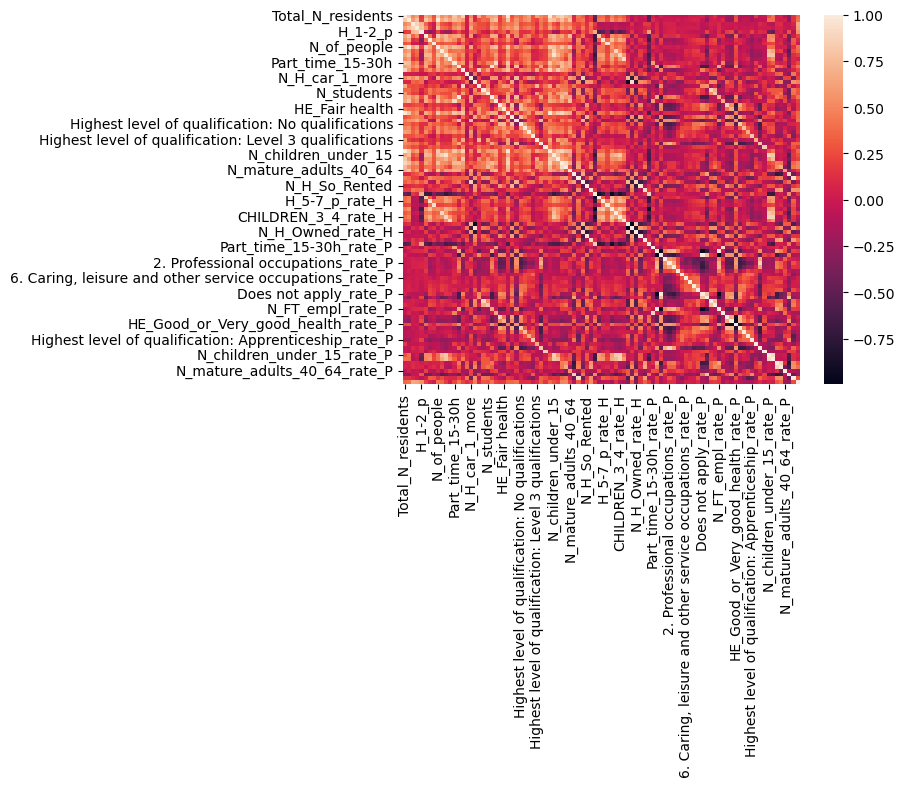

In [61]:
sns.heatmap(data_mid.drop(columns = {'OA21CD','mean_house_area','max_house_area','min_house_area','1. Managers, directors and senior officials',
       '2. Professional occupations',
       '3. Associate professional and technical occupations',
       '4. Administrative and secretarial occupations',
       '5. Skilled trades occupations',
       '6. Caring, leisure and other service occupations',
       '7. Sales and customer service occupations',
       '8. Process, plant and machine operatives', '9. Elementary occupations','Does not apply','median_house_area',
       'max_house_area', 'min_house_area'}).corr())
plt.show()

In [11]:
data = data_mid.merge(cluster, on = 'OA21CD', how = 'left')
print('There is ' + str(data.min_house_area.isna().value_counts()[1]) + " OA areas that don't have a single record in epc data" )
print('There is ' + str(data.cluster_9.isna().value_counts()[1]) + " OA areas that don't have a cluster" )
print('These overlap on ' + str(len(data[(data.min_house_area.isna()&data.cluster_9.isna())])) + " rows" )


There is 43 OA areas that don't have a single record in epc data
There is 36990 OA areas that don't have a cluster
These overlap on 32 rows


## Next steps

We only want to keep those areas that have a cluster so 

1. drop observation with no cluster

For all the other obesrvations we are ok having no area, but for those that do have that information we want to calculate the density of people per average household area which wil give us teh density of households.

2. household_density_mean = number of households/mean house area
3. pop_hous_density_mean = number of peole/ mean house area
4. household_density_median = number of households/median house area
5. pop_hous_density_median = number of peole/ median house area

In [63]:
data.columns

Index(['OA21CD', 'Total_N_residents', 'N_residents_no_community',
       'N_dwellings', 'N_households', 'H_1-2_p', 'H_3-4_p', 'H_5-7_p',
       'H_8-more_p', 'N_of_people',
       ...
       'N_young_adults_20_39_rate_P', 'N_mature_adults_40_64_rate_P',
       'N_retirees_65_m_rate_P', 'N_immigrants_arrived_after18_rate_P',
       'mean_house_area', 'median_house_area', 'max_house_area',
       'min_house_area', 'count_houses', 'cluster_9'],
      dtype='object', length=112)

In [12]:
data = data[~data.cluster_9.isna()]
data['household_density_mean'] = data['N_households']/data['mean_house_area']
data['pop_hous_density_mean'] = data['N_of_people']/ data['mean_house_area']
data['household_density_median'] = data['N_households']/data['median_house_area']
data['pop_hous_density_median'] = data['N_of_people']/data['median_house_area']

In [13]:
data.cluster_9.unique()

array([7., 1., 4., 5., 9., 6., 8., 3., 2.])

In [14]:
sums = data.drop(columns = {'OA21CD'}).groupby(['cluster_9']).sum()
sums['type'] = 'sums'
means = data.drop(columns = {'OA21CD'}).groupby(['cluster_9']).mean()
means['type'] = 'mean'
medians = data.drop(columns = {'OA21CD'}).groupby(['cluster_9']).median()
medians['type'] = 'median'
mins = data.drop(columns = {'OA21CD'}).groupby(['cluster_9']).min()
mins['type'] = 'min'
maxs = data.drop(columns = {'OA21CD'}).groupby(['cluster_9']).max()
maxs['type'] = 'max'

grouped_data = pd.concat([sums,means,medians,mins,maxs])


In [17]:
data.to_csv('./../Data/Clusters_EfficiencyinPRS/OA_Clusters_full_data.csv')
grouped_data.to_csv('./../Data/Clusters_EfficiencyinPRS/OA_Clusters_grouped.csv')